In [ ]:
from google.colab import files
files.upload()



Saving archive.zip to archive (1).zip


In [ ]:
!unzip -q archive.zip -d dataset
!ls dataset



annotations  images


In [ ]:
import os

unzip_path = "/content/dataset"  # update this if your folder name is different

for root, dirs, files in os.walk(unzip_path):
    print(f"\n📁 Folder: {root}")
    for f in files[:5]:  # preview only first 5 files
        print("   └──", f)
    break  # only show top-level folder



📁 Folder: /content/dataset


In [ ]:
import cv2
import xml.etree.ElementTree as ET
import numpy as np

def load_data(image_dir, annotation_dir):
    data = []
    label_map = {"with_mask": 0, "without_mask": 1, "mask_weared_incorrect": 2}

    for file in os.listdir(annotation_dir):
        if not file.endswith('.xml'):
            continue

        tree = ET.parse(os.path.join(annotation_dir, file))
        root = tree.getroot()
        filename = root.find('filename').text
        img_path = os.path.join(image_dir, filename)

        img = cv2.imread(img_path)
        if img is None:
            continue

        for obj in root.findall('object'):
            label = obj.find('name').text
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)

            face = img[ymin:ymax, xmin:xmax]
            face = cv2.resize(face, (128, 128))
            data.append([face, label_map[label]])

    return data

image_dir = "/content/dataset/images"
annotation_dir = "/content/dataset/annotations"

data = load_data(image_dir, annotation_dir)


In [ ]:
import os
import cv2
import numpy as np
import xml.etree.ElementTree as ET

IMG_SIZE = 128
dataset_dir = "/content/dataset"

# Label mapping
label_map = {
    "with_mask": 0,
    "without_mask": 1,
    "mask_weared_incorrect": 2
}

data = []

for file in os.listdir(dataset_dir):
    if file.endswith('.xml'):
        xml_path = os.path.join(dataset_dir, file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        filename = root.find('filename').text
        image_path = os.path.join(dataset_dir, filename)

        img = cv2.imread(image_path)
        if img is None:
            print(f"⚠️ Could not read image: {image_path}")
            continue

        for obj in root.findall('object'):
            label = obj.find('name').text
            if label not in label_map:
                continue

            bbox = obj.find('bndbox')
            xmin = int(float(bbox.find('xmin').text))
            ymin = int(float(bbox.find('ymin').text))
            xmax = int(float(bbox.find('xmax').text))
            ymax = int(float(bbox.find('ymax').text))

            face = img[ymin:ymax, xmin:xmax]
            if face.size == 0:
                continue
            face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
            data.append([face, label_map[label]])


In [ ]:
print("Total faces extracted:", len(data))


Total faces extracted: 0


In [ ]:
for file in os.listdir(dataset_dir):
    if file.endswith('.xml'):
        xml_path = os.path.join(dataset_dir, file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        filename = root.find('filename').text
        image_path = os.path.join(dataset_dir, filename)

        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Image not found or unreadable: {image_path}")
            continue

        for obj in root.findall('object'):
            label = obj.find('name').text
            if label not in label_map:
                print(f"⚠️ Unknown label found: {label}")
                continue

            bbox = obj.find('bndbox')
            xmin = int(float(bbox.find('xmin').text))
            ymin = int(float(bbox.find('ymin').text))
            xmax = int(float(bbox.find('xmax').text))
            ymax = int(float(bbox.find('ymax').text))

            face = img[ymin:ymax, xmin:xmax]
            if face.size == 0:
                print(f"⚠️ Empty face crop in: {filename}")
                continue

            face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
            data.append([face, label_map[label]])


In [ ]:
import os

dataset_dir = "/content/dataset"

# Show sample files
print("Sample XML files:")
print([f for f in os.listdir(dataset_dir) if f.endswith('.xml')][:5])

print("\nSample image files:")
print([f for f in os.listdir(dataset_dir) if f.endswith(('.png', '.jpg', '.jpeg'))][:5])


Sample XML files:
[]

Sample image files:
[]


In [ ]:
import xml.etree.ElementTree as ET

sample_xml = "/content/dataset/annotations/maksssksksss0.xml"  # change if different
tree = ET.parse(sample_xml)
root = tree.getroot()

print("Filename from XML:", root.find("filename").text)
print("Label(s) in XML:")
for obj in root.findall("object"):
    label = obj.find("name").text
    print("  →", label)



Filename from XML: maksssksksss0.png
Label(s) in XML:
  → without_mask
  → with_mask
  → without_mask


✅ Image loaded


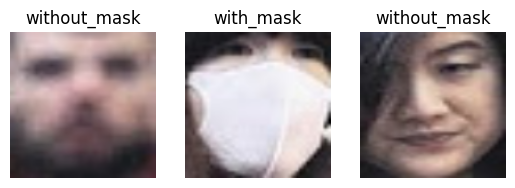

In [ ]:
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

IMG_SIZE = 128
image_path = "/content/dataset/images/maksssksksss0.png"
xml_path = "/content/dataset/annotations/maksssksksss0.xml"

# Load image
img = cv2.imread(image_path)
if img is None:
    print("❌ Image not loaded")
else:
    print("✅ Image loaded")

# Parse XML
tree = ET.parse(xml_path)
root = tree.getroot()

faces = []
labels = []

label_map = {
    "with_mask": 0,
    "without_mask": 1,
    "mask_weared_incorrect": 2
}

for obj in root.findall("object"):
    label = obj.find("name").text
    if label not in label_map:
        continue

    bbox = obj.find("bndbox")
    xmin = int(float(bbox.find("xmin").text))
    ymin = int(float(bbox.find("ymin").text))
    xmax = int(float(bbox.find("xmax").text))
    ymax = int(float(bbox.find("ymax").text))

    face = img[ymin:ymax, xmin:xmax]
    if face.size == 0:
        continue
    face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
    faces.append(face)
    labels.append(label)

# Display faces
for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')

plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Convert to numpy arrays
X = np.array(faces) / 255.0
y = np.array([label_map[lbl] for lbl in labels])
y = to_categorical(y, num_classes=3)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



X_train shape: (2, 128, 128, 3)
y_train shape: (2, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: with_mask, without_mask, incorrect
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.1907 - val_accuracy: 0.0000e+00 - val_loss: 1.6185
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step - accuracy: 0.5000 - loss: 1.1162 - val_accuracy: 1.0000 - val_loss: 0.7457
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 1.0000 - loss: 0.2789 - val_accuracy: 1.0000 - val_loss: 0.2423
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 1.0000 - loss: 0.1440 - val_accuracy: 1.0000 - val_loss: 0.1132
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 1.0000 - loss: 0.1649 - val_accuracy: 1.0000 - val_loss: 0.1161
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.0000e+00 - loss: 5.4680 - val_accuracy: 1.0000 - val_loss: 0.1504
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5000 - loss: 3.2432 - val_accuracy: 1.0000 - val_loss: 0.5112
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5000 - loss: 1.3078 - val_accuracy: 0.0000e+00 - 

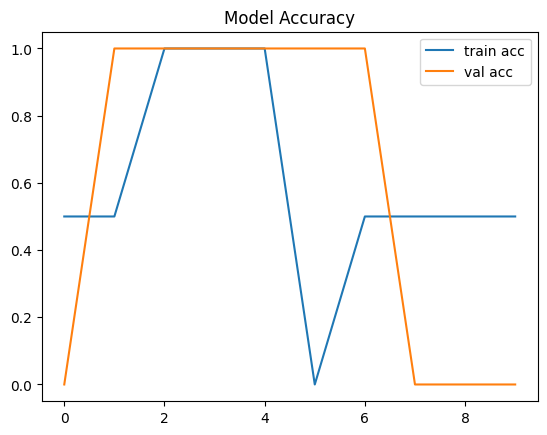

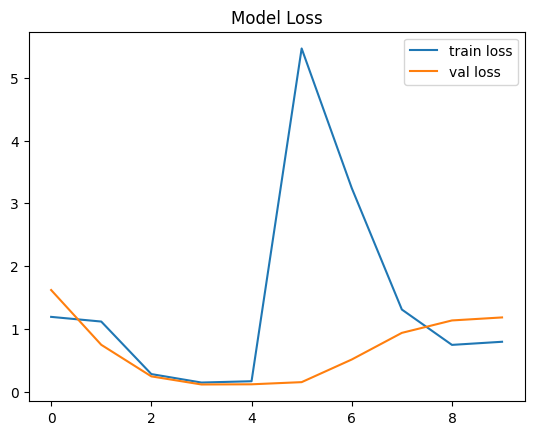

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [ ]:
model.save("face_mask_classifier.h5")
